In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sys import path
from oasis.functions import gen_data, gen_sinusoidal_data, deconvolve, estimate_parameters
from oasis.plotting import simpleaxis
from oasis.oasis_methods import oasisAR1, oasisAR2
import session

C:\anaconda3\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


In [2]:
def plot_trace(groundtruth=False):
    plt.figure(figsize=(20,4))
    plt.subplot(211)
    plt.plot(b+c, lw=2, label='denoised')
    if groundtruth:
        plt.plot(true_b+true_c, c='r', label='truth', zorder=-11)
    plt.plot(y, label='data', zorder=-12, c='y')
    plt.legend(ncol=3, frameon=False, loc=(.02,.85))
    simpleaxis(plt.gca())
    plt.subplot(212)
    plt.plot(s, lw=2, label='deconvolved', c='g')
    if groundtruth:
        for k in np.where(true_s)[0]:
            plt.plot([k,k],[-.1,1], c='r', zorder=-11, clip_on=False)
    plt.ylim(0,1.3)
    plt.legend(ncol=3, frameon=False, loc=(.02,.85));
    simpleaxis(plt.gca())
    print("Correlation of deconvolved activity  with ground truth ('spikes') : %.4f" % np.corrcoef(s,true_s)[0,1])
    print("Correlation of denoised fluorescence with ground truth ('calcium'): %.4f" % np.corrcoef(c,true_c)[0,1])

Minimum cutoff is 46


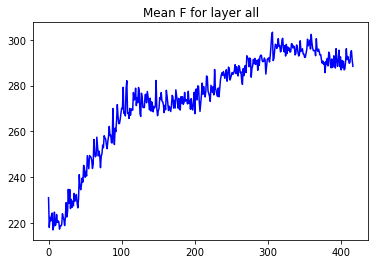

In [3]:
path = r'F:\data\BAYLORCW021\python\2023_04_27'
l1 = session.Session(path)


In [31]:
t,n=10,10
y = l1.dff[0, t][n, :l1.time_cutoff]

In [33]:
s

array([ 0.00000000e+00,  0.00000000e+00,  3.46944695e-18, -6.50521303e-19,
        7.39579789e-02,  0.00000000e+00,  4.33680869e-19, -8.13151629e-20,
        1.35525272e-20,  7.20294852e-02,  0.00000000e+00,  4.33680869e-19,
       -8.13151629e-20,  1.35525272e-20,  2.54109884e-21, -9.52912066e-22,
        6.61744490e-23,  9.92616735e-24,  8.27180613e-25,  2.06795153e-25,
        3.23117427e-26, -2.26182199e-26,  6.05845175e-28,  1.68123355e-02,
        0.00000000e+00,  5.42101086e-20, -2.03287907e-20,  3.38813179e-21,
        5.08161429e-02,  0.00000000e+00,  1.40187130e-01,  4.18537090e-02,
        1.82047423e-01,  0.00000000e+00,  8.67361738e-19, -2.16840434e-19,
        5.42101086e-20,  3.29213244e-01,  0.00000000e+00,  1.73472348e-18,
       -4.33680869e-19,  8.13151629e-20,  8.82540186e-02,  0.00000000e+00,
        4.33680869e-19,  1.96867329e-01])

In [34]:
s + np.zeros(72)

ValueError: operands could not be broadcast together with shapes (46,) (72,) 

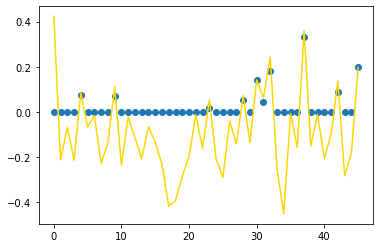

In [29]:
c, s, b, g, lam = deconvolve(y)
true_b=2

# plot_trace()
plt.plot(y, 'gold')
plt.scatter(range(len(s)), s)


In [ ]:
gen_data(N=1, b=true_b, seed=0)

In [ ]:
# here we generate some simulated fluorescence data and plot it
true_b = 2
y, true_c, true_s = map(np.squeeze, gen_data(N=1, b=true_b, seed=0))
plt.figure(figsize=(20,4))
plt.plot(y, c='y');

In [ ]:
true_c

In [ ]:
%time c, s, b, g, lam = deconvolve(y, penalty=1)


In [ ]:
plot_trace(True)


In [ ]:
# Here we provide the ground truth values for b and g. 
# The Ca response kernel to 1 AP has maximal amplitude 1 and we pick s_min slightly larger than 1/2.
%time c, s = oasisAR1(y-true_b, g=.95, s_min=.55)
plot_trace(True)
